<font size = 6><b> PFE </b></font>

Adds

--

<font size = 4><b> Imports</b></font>

--

In [1]:
import os
import pandas 
import numpy as np
import pandas as pd


NB_CONFIGURATIONS = 1152 

## We are studying two quantitative/performance properties: 
# elapsed time
# and size of the output 
# we have two distinct datasets for both

predDimension = "size" # "elapsedtime" # 
    
### It is simple/convenient to fix the "order" of dataset once and for all 
# (listing can be sensitive to eg an operating system)
### if you want you can use this method
#dataFolder="./datay4m" 
#listeAdresse = []
#adresseIni = os.listdir(dataFolder)
#for video in adresseIni: 
#    listeRep = os.listdir(dataFolder + "/" + video)
#    for rep in listeRep:
#        listeAdresse.append(dataFolder + "/" + video + "/" + rep)

# dataFolder="./datacalda" 
# all processing using the same exact cluster on IGRIDA (calda) and video format (y4m)
# (experiments suggest that hardware or video format does influence execution time)

dataTimeFolder = './datacalda2/'
dataSizeFolder = './datay4m2/'

def mkDataTime(): 
    return [dataTimeFolder + 'x264-1908-bridgefar-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-ice-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-flower-wasm/x264-results1.csv',
# './datacalda/x264-0408-tos3k-wasm/x264-results1.csv', # can't retrieve the original video
 dataTimeFolder + 'x264-1908-caire-wasm/x264-results1.csv',
# './datacalda/x264-0308-sintel-wasm/x264-results1.csv', # same as calda for time
 dataTimeFolder + 'x264-0208-sintel-calda-wasm/x264-results1.csv', # representative video, right? 
 dataTimeFolder + 'x264-1908-footballcif-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0308-crowd_run-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-blue-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-people-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-sunflowers-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0408-deadline-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-2108-bridgeclose-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-husky-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-tennis-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-riverbed-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-park-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0508-soccer-wasm/x264-results1.csv']

# dataFolder="./datay4m"
# all processing using the same video format (y4m) 
# (experiments confirm that hardware/cluster does not change anything about the size)
def mkDataSize(): 
    return [dataSizeFolder + 'x264-1908-akiyo-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-bridgefar-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-football15-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-tractor-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-ice-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-students-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-flower-wasm/x264-results1.csv',
# './datay4m/x264-0408-tos3k-wasm/x264-results1.csv', # can't retrieve the original video
 dataSizeFolder + 'x264-1908-caire-wasm/x264-results1.csv',
# './datay4m/x264-0308-sintel-wasm/x264-results1.csv', # same as calda for size
 dataSizeFolder + 'x264-0208-sintel-calda-wasm/x264-results1.csv', # representative video, right? 
 dataSizeFolder + 'x264-0308-ducks-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-footballcif-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0308-crowd_run-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-blue-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-people-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-sunflowers-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-2108-netflix-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0408-deadline-wasm/x264-results1.csv',
# './datay4m/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv', # same as crowd above
 dataSizeFolder + 'x264-2108-bridgeclose-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-husky-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-waterfall-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0308-mobilesif-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-tennis-wasm/x264-results1.csv',
 # './datay4m/x264-0408-football-wasm/x264-results1.csv', # same as football15
 dataSizeFolder + 'x264-1908-riverbed-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-park-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0508-soccer-wasm/x264-results1.csv']
 
# the key idea is to have in the *same order* video (for the size dataset or the time dataset)
# ie each "common" video will have the same "identifier"
def mkData(): 
    
    sizeAlignment = [x.replace(dataSizeFolder, '') for x in mkDataSize()]
    timeAlignment = [x.replace(dataTimeFolder, '') for x in mkDataTime()]
    common = []
    for s in sizeAlignment: 
        if s in timeAlignment:
            common.append(s)    
            
    common = np.sort(common)

    specificSize = []
    for s in sizeAlignment: 
        if s not in timeAlignment:
            specificSize.append(s)

    specificSize = np.sort(specificSize)
            
    # unnecessary 
    specificTime = []
    for t in timeAlignment: 
        if t not in sizeAlignment:
            specificTime.append(t)

    # time datas are subsets of size datas
    assert(len(specificSize) + len(common) == len(sizeAlignment))
    assert (len(specificTime) == 0)
    
    if predDimension == "size":     # mkDataSize()
        return list(map(lambda s: dataSizeFolder + s, np.append(common, specificSize)))
    elif predDimension == "elapsedtime":     #mkDataTime() 
        return list(map(lambda s: dataTimeFolder + s, np.append(common, specificTime)))
    else: 
        print("Error (pred dimension unknown)")

listeAdresse = mkData() # mkDataTime() #
if predDimension == "size":
    assert(len(listeAdresse) == len(mkDataSize()))
elif predDimension == "elapsedtime":
    assert(len(listeAdresse) == len(mkDataTime()))
#print(np.sort(mkDataSize()))
#print(np.sort(mkDataTime()))

#print(np.intersect1d(mkDataSize(), mkDataTime()))


        
# creation of the list of videos (for each video: x264 configurations + measurements)
listeVideo = []
for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))
# test
print("There are " + str(len(listeVideo)) + " videos")
assert (len(listeAdresse) == len(listeVideo))
listeAdresse
#vidEx = listeVideo[0][0:5]
#vidEx.drop(['usertime', 'systemtime'], axis=1)
#pd.DataFrame(listeVideo[2])#['elapsedtime']
#listeVideo[1]


There are 25 videos


['./datay4m2/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './datay4m2/x264-0308-crowd_run-wasm/x264-results1.csv',
 './datay4m2/x264-0408-deadline-wasm/x264-results1.csv',
 './datay4m2/x264-0508-soccer-wasm/x264-results1.csv',
 './datay4m2/x264-0608-blue-wasm/x264-results1.csv',
 './datay4m2/x264-0608-park-wasm/x264-results1.csv',
 './datay4m2/x264-0608-people-wasm/x264-results1.csv',
 './datay4m2/x264-1908-bridgefar-wasm/x264-results1.csv',
 './datay4m2/x264-1908-caire-wasm/x264-results1.csv',
 './datay4m2/x264-1908-flower-wasm/x264-results1.csv',
 './datay4m2/x264-1908-footballcif-wasm/x264-results1.csv',
 './datay4m2/x264-1908-husky-wasm/x264-results1.csv',
 './datay4m2/x264-1908-ice-wasm/x264-results1.csv',
 './datay4m2/x264-1908-riverbed-wasm/x264-results1.csv',
 './datay4m2/x264-1908-sunflowers-wasm/x264-results1.csv',
 './datay4m2/x264-1908-tennis-wasm/x264-results1.csv',
 './datay4m2/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './datay4m2/x264-0308-ducks-wasm/x264-resul

In [2]:
if (predDimension == "elapsedtime"):
    mean_times_per_video = pd.DataFrame(columns=["mean_time"])
    for i in range(0, len(listeAdresse)):
        mean_times_per_video.loc[i] = (listeVideo[i][predDimension].mean())
    max_meantime = max(mean_times_per_video["mean_time"])
    print("It can take up to ", round((max_meantime * NB_CONFIGURATIONS) / 3600, 2), "hours for computing all configurations")

<font size = 4><b> Configurations sorting</b></font>

--

In [3]:
dico = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico.keys():
            dico[i["configurationID"][j]]=i[predDimension][j]
        else : 
            dico[i["configurationID"][j]]=dico[i["configurationID"][j]]+i[predDimension][j]            
            

In [4]:
dico2 = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico2.keys():
            dico2[i["configurationID"][j]]=[i[predDimension][j]]
        else : 
            dico2[i["configurationID"][j]].append(i[predDimension][j])
        

In [5]:
res = pandas.DataFrame.from_dict(dico, orient='index')
res.reset_index(inplace= True)
res.columns=['configid','sum']
res.sort_values("sum",inplace=True)
print(res[0:2])
print("...")
print(res[1150:1152])

     configid          sum
939       807  140810699.0
768       653  140810699.0
...
     configid          sum
625       524  213860301.0
572       477  213860301.0


We add all the time of all inputs, and calculate the sum of it by config before sorting.
We can see that the difference between the first and the last configurations (*2.5 in time)

In [6]:
res2 = pandas.DataFrame.from_dict(dico2, orient='index')
res2.sum(axis = 1)
res3 = res2.transpose()
res3.describe().transpose()[0:5]
# res3.describe().transpose().sort_values(by="mean")

,count,mean,std,min,25%,50%,75%,max
1,25.0,7014301.40,9.786463e+06,42417.0,845930.0,1718492.0,7293621.0,29660232.0
10,25.0,7891873.92,1.097061e+07,47381.0,921864.0,1962957.0,8398021.0,32208395.0
100,25.0,5983505.40,8.072455e+06,55228.0,778028.0,1989710.0,8470682.0,26696150.0
1000,25.0,6555441.28,8.973248e+06,58565.0,831677.0,2044093.0,9136214.0,30128532.0
1001,25.0,7303244.96,9.973960e+06,47985.0,921861.0,2066645.0,7986404.0,31223670.0


<font size = 4><b> Correlations matrix about Kullback-Leiber divergence </b></font>

--

In [7]:
import scipy.stats as sc
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

taille = len(listeVideo)

divKLTaille = [[0 for x in range(taille)] for y in range(taille)]
divKLTaille2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTaille[i][j] = sc.entropy(pk=listeVideo[i]['size'],
                                       qk=listeVideo[j]['size'])

indiceTaille = dendrogram(linkage(divKLTaille, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTaille2[i][j] = sc.entropy(pk=listeVideo[indiceTaille[i]]['size'],
                                        qk=listeVideo[indiceTaille[j]]['size'])
        
plt.subplots(figsize=(10, 10))
plt.imshow(divKLTaille2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of size')
plt.xticks(range(len(indiceTaille)),indiceTaille)
plt.yticks(range(len(indiceTaille)), indiceTaille)
plt.colorbar()
plt.show()

divKLTemps = [[0 for x in range(taille)] for y in range(taille)]
divKLTemps2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTemps[i][j] = sc.entropy(pk=listeVideo[i][predDimension],
                                      qk=listeVideo[j][predDimension])
        
indiceTemps = dendrogram(linkage(divKLTemps, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTemps2[i][j] = sc.entropy(pk=listeVideo[indiceTemps[i]][predDimension],
                                       qk=listeVideo[indiceTemps[j]][predDimension])

        
plt.subplots(figsize=(10, 10))
plt.imshow(divKLTemps2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of time')
plt.xticks(range(len(indiceTemps)),indiceTemps)
plt.yticks(range(len(indiceTemps)), indiceTemps)
plt.colorbar()
plt.show()

<Figure size 1000x1000 with 2 Axes>

<Figure size 1000x1000 with 2 Axes>

We need one mean to compare all the clustering we have done. What differency them?

<font size = 4><b> General function for transfering video i on video j </b></font>

--

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, SVR
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor

def transfer(var,varexp1,varexp2,i,j,testSize,method):
    # where var is either 'size' or 'elapsedtime'
    # varexp1 & varexp2 two parameter of configuration
    # i is the number of the "learning" video
    # j is the video which will benefits from the learning of i
    # testSize is the size of the test dataset (70 for 70% of tests)
    # method is 'sv' for support vector, 'rf' for random forest, 'reg' for regression

    st = testSize/100
    
    # Split the targets into training/testing sets
    x_train, x_test, y_train, y_test = train_test_split(listeVideo[i][[var, varexp1,varexp2]], 
                                                        listeVideo[j][var], 
                                                        test_size= st, 
                                                        random_state=0)
    
    #choose the method
    if method == 'reg':
        clf = linear_model.LinearRegression()
        
    if method == 'rf':
        clf = RandomForestRegressor(n_estimators=20)
        
    if method == 'sv':
        clf = SVC(kernel='rbf', C=1e10, gamma=1e-8)
      
    # Apply the model to the training datasets and predict for the testing dataset
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Then we plot the prediction vs the reality
    plt.scatter(x_test['size'], y_test,  color='black')
    plt.scatter(x_test['size'], y_pred,  color='red')
    plt.xticks(())
    plt.yticks(())
    plt.show()

We test the function on tranfer with video 1 and video 5

svm
Variance score: 0.96


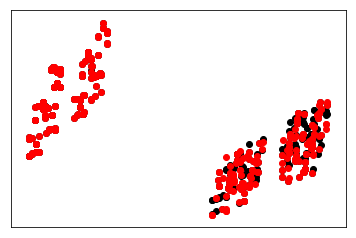

reg
Variance score: 0.79


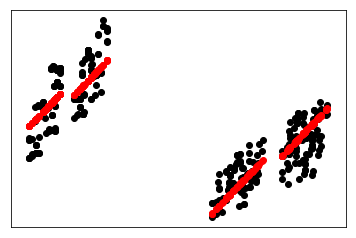

random forest
Variance score: 0.97


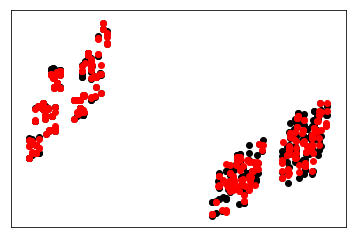

In [9]:
print("svm")
transfer('size','no_mbtree','no_cabac',1,6,30,'sv')
print("reg")
transfer('size','no_mbtree','no_cabac',1,6,30,'reg')
print("random forest")
transfer('size','no_mbtree','no_cabac',1,6,30,'rf')

<font size = 4><b> Group of configurations</b></font>

--

In [10]:
classement_general={}
for j in range(len(listeVideo)):
    classement = {}
    liste_temps=listeVideo[j][predDimension]
    for i in range(len(listeVideo[j][predDimension])):
        classement[listeVideo[j]["configurationID"][i]]=listeVideo[j][predDimension][i]
    classement=sorted(classement.items(), key=lambda t:t[1])
    classement_general[j]=classement
len(classement_general)

25

In [11]:
tableau={}
for c in range(1,len(listeVideo[0])+1):
    conf1={}
    for i in range(len(listeVideo)):
        classement_config=0
        for j in range(len(listeVideo[0])):
            if classement_general[i][j][0]==c:
                classement_config = classement_general[i].index(classement_general[i][j])
                
        conf1[i+1] = classement_config
    tableau[c]=conf1

<font size = 4><b> Dataframe of ordering configurations</b></font>

--

In [12]:
tableau2=pandas.DataFrame(data=tableau)
tableau_joli=tableau2.transpose()

## for each configuration id, ranking for each video
tableau_joli
#se lit comme tel : la première configuration est la deuxième moins efficace pour la première vidéo

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
1,127,665,29,462,374,598,98,39,75,655,...,287,12,787,602,387,87,657,58,517,581
2,133,671,53,517,366,607,112,61,72,659,...,311,37,781,616,423,71,712,95,491,563
3,1117,505,1084,638,607,499,970,964,1135,526,...,782,951,538,415,777,1144,517,871,605,569
4,1106,472,1112,671,657,530,949,1100,1082,560,...,860,1120,524,540,841,1088,533,906,616,658
5,1123,490,977,602,700,448,1108,985,1117,406,...,638,900,544,232,799,1108,451,696,464,462
6,227,782,161,842,725,805,147,361,84,780,...,817,257,699,908,557,70,859,267,563,608
7,148,716,127,494,599,646,162,94,184,687,...,300,77,790,695,426,243,666,437,738,721
8,1127,515,1070,663,707,470,1124,1043,1115,458,...,708,981,551,290,847,1112,479,805,450,495
9,1103,494,1031,597,612,491,980,929,1139,515,...,735,869,536,395,737,1142,473,816,649,584
10,350,883,374,874,943,825,401,205,401,923,...,780,284,1011,776,690,347,872,919,975,943


configuration with the worst std
std per configuration


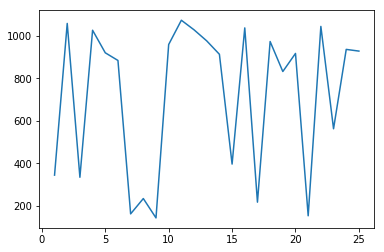

In [13]:
print ("configuration with the worst std")
tableau_joli.loc[tableau_joli.transpose().describe().transpose()['std'].idxmax()].plot()
print ("std per configuration")
stds_confs = tableau_joli.transpose().describe().transpose()['std'].describe()

In [14]:
groupe={}
for i in range(1,len(listeVideo)):
    groupe[i]=tableau_joli.loc[tableau_joli[i]<10].index
groupe 

{1: Int64Index([241, 245, 588, 657, 738, 740, 860, 873, 935, 940], dtype='int64'),
 2: Int64Index([385, 594, 618, 626, 653, 706, 752, 804, 807, 836], dtype='int64'),
 3: Int64Index([241, 245, 513, 543, 724, 738, 740, 860, 899, 1047], dtype='int64'),
 4: Int64Index([385, 594, 618, 626, 653, 706, 752, 804, 807, 836], dtype='int64'),
 5: Int64Index([618, 621, 653, 658, 751, 752, 807, 810, 817, 842], dtype='int64'),
 6: Int64Index([360, 385, 427, 455, 594, 626, 706, 752, 804, 836], dtype='int64'),
 7: Int64Index([238, 241, 245, 588, 654, 736, 738, 740, 822, 828], dtype='int64'),
 8: Int64Index([241, 245, 588, 657, 738, 740, 828, 860, 954, 1047], dtype='int64'),
 9: Int64Index([238, 241, 245, 519, 543, 654, 736, 738, 740, 822], dtype='int64'),
 10: Int64Index([395, 426, 492, 594, 618, 626, 653, 706, 807, 874], dtype='int64'),
 11: Int64Index([385, 427, 455, 594, 751, 752, 804, 810, 836, 842], dtype='int64'),
 12: Int64Index([31, 73, 152, 385, 427, 455, 618, 752, 804, 836], dtype='int64'),
 

<font size = 4><b> Top 10 configurations</b></font>

--

In [15]:
groupe_config={}
for i in (0,9):
    for j in range(1,len(listeVideo)):
        l=[]
        for c in range(0,10):
            for k in range(1,len(listeVideo)):
                if groupe[j][i]==groupe[k][c]:
                    if groupe[j][i] not in groupe_config.keys():
                        l.append(k)
                        groupe_config[groupe[j][i]]=l
                    else : 
                        groupe_config[groupe[j][i]].append(k)
for i in groupe_config:
    groupe_config[i]=set(groupe_config[i])
groupe_config

{241: {1, 3, 7, 8, 9, 15, 21, 23},
 385: {2, 4, 6, 11, 12, 19, 20},
 618: {2, 4, 5, 10, 12, 13, 16, 18, 19, 20},
 360: {6},
 238: {7, 9},
 395: {10, 16, 22},
 31: {12, 19, 22},
 750: {14},
 245: {1, 3, 7, 8, 9, 15, 17, 21, 23},
 590: {18},
 27: {22},
 21: {24},
 940: {1},
 836: {2, 4, 6, 11, 12, 13, 19, 20, 22},
 1047: {3, 8, 15, 17, 23},
 842: {5, 11},
 828: {7, 8, 15, 17},
 822: {7, 9, 21},
 874: {10, 16},
 981: {14},
 807: {2, 4, 5, 10, 13, 16, 18, 20},
 869: {21},
 1135: {22},
 1132: {24}}

Worst case rank diff (with at least one ranking in top 100) 750
worst_config_rank dispersion (between 10% and 50%)332
worst_config_rank dispersion (between 1% and 50%)332


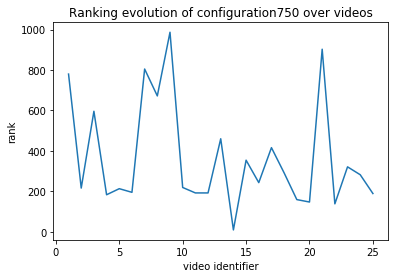

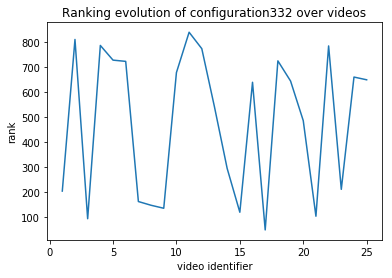

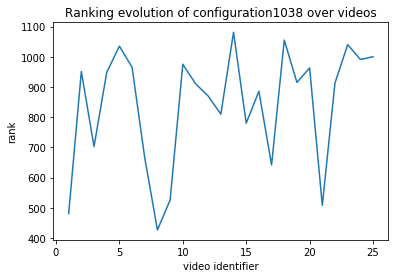

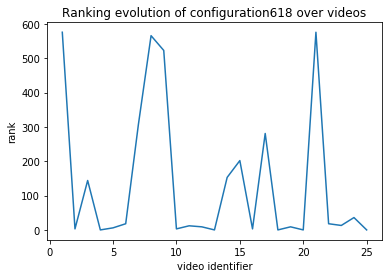

1     576
2       3
3     144
4       0
5       6
6      18
7     307
8     566
9     523
10      3
11     12
12      9
13      0
14    153
15    202
16      3
17    281
18      0
19      9
20      0
21    576
22     18
23     13
24     36
25      0
Name: 618, dtype: int64

In [24]:
import pandas as pd
rank_configs = tableau_joli.transpose().describe(percentiles=[.01, .1, .25, .5, .75, .9]).transpose().query('min < 50')
rank_maxmin_diff = pd.Series(rank_configs['max'] - rank_configs['min']).idxmax() # 1114
print("Worst case rank diff (with at least one ranking in top 100) " + str(rank_maxmin_diff))
# worstcase_rank_diff = tableau_joli.transpose()[worstcase_rank_maxmin_diff].values.argmax()
# tableau_joli.transpose()[worstcase_rank_diff].describe()
#tableau_joli.transpose()[1114].plot()
#plt.show()

#(rank_configs['mean']).argmax()
#tableau_joli.transpose()[404].describe()
#rank_configs['std'].sort_values()
#(rank_configs['25%'] - rank_configs['75%']).sort_values() #.describe()
#(rank_configs['10%'] - rank_configs['90%']).sort_values()
worst_config_rank = (rank_configs['10%'] - rank_configs['50%']).sort_values().index[0]
print("worst_config_rank dispersion (between 10% and 50%)" + str(worst_config_rank))

worst_config_rank2 = (rank_configs['1%'] - rank_configs['50%']).sort_values().index[0]
print("worst_config_rank dispersion (between 1% and 50%)" + str(worst_config_rank2))

#(rank_configs['max'] - rank_configs['min']).sort_values()

def rank_evolution(cid, filename=None):
    tableau_joli.transpose()[cid].plot()
    plt.xlabel('video identifier')
    plt.ylabel('rank')
    plt.title("Ranking evolution of configuration" + str(cid) + " over videos")
    if (filename is None):
        plt.savefig("rankingevo-c" + str(cid) + ".pdf", format="pdf", bbox_inches='tight')
    else:
        plt.savefig(filename + ".pdf", format="pdf", bbox_inches='tight')
    plt.show()




# huge fluctuations (but on the overall)
rank_evolution(rank_maxmin_diff)
rank_min_diff = tableau_joli.transpose()[rank_maxmin_diff].min()
rank_max_diff = tableau_joli.transpose()[rank_maxmin_diff].max()
video_rank_max_diff = tableau_joli.transpose()[rank_maxmin_diff].idxmax()
video_rank_min_diff = tableau_joli.transpose()[rank_maxmin_diff].idxmin()
video_rank_max_diff = tableau_joli.transpose()[rank_maxmin_diff].idxmax()

# huge fluctuations
rank_evolution(worst_config_rank)

# small fluctuations (eg always a worst configuration)
rank_evolution(tableau_joli.transpose().describe().transpose()['std'].idxmin())
#tableau_joli.transpose().describe().transpose().describe()

rank_evolution(tableau_joli.transpose().describe().transpose()['mean'].idxmin())
# tableau_joli.transpose()[worst_config_rank2]

# tableau_joli.transpose()[tableau_joli.transpose().describe().transpose()['mean'].idxmin()]

# Are there some configurations more sensitive to input videos? (only applies to SIZE!)

The standard deviation among ranking configurations is {{round(stds_confs['mean'], 2)}} on average (max: {{round(stds_confs['max'], 2)}}). Ranking changes per configuration are significant for an important majority of configurations and videos. 

For example, configuration {{ tableau_joli.transpose().describe().transpose()['mean'].idxmin() }} is the best configuration for 5 videos, but can be ranked in the middle for other videos

{{ rank_evolution(tableau_joli.transpose().describe().transpose()['mean'].idxmin(), "unstableranking1-configuration-size")}}

Configuration {{rank_maxmin_diff}} is ranked {{rank_min_diff}}th for video {{video_rank_min_diff}} and {{rank_max_diff}}th for video {{video_rank_max_diff}} (out of {{NB_CONFIGURATIONS}}). 
This "swing" is the most important one. 

{{ rank_evolution(rank_maxmin_diff, "unstableranking2-configuration-size") }}


There are few favorable cases. In practical terms, the direct reuse of size prediction model would often lead to the choice of configurations far from optimality. 





# Are there some configurations more sensitive to input videos? (only applies to TIME!)

The standard deviation among ranking configurations is {{round(stds_confs['mean'], 2)}} on average (max: {{round(stds_confs['max'], 2)}}). There are cases in which configurations have a stable ranking:
{{rank_evolution(tableau_joli.transpose().describe().transpose()['std'].idxmin(), "stableranking-configuration1")}}
{{ rank_evolution(tableau_joli.transpose().describe().transpose()['mean'].idxmin(), "stableranking-configuration2")}}
It lets suggest that ranking changes per configuration are not significant (in general). 
However there are less favorable cases. Configuration {{rank_maxmin_diff}} is ranked {{rank_min_diff}}th for video {{video_rank_min_diff}} and {{rank_max_diff}}th for video {{video_rank_max_diff}} (out of {{NB_CONFIGURATIONS}}). 
This "swing" is the most important one. 

Figure below shows another configuration example with noticeable changes in the rankings:
{{rank_evolution(worst_config_rank, "unstableranking-configuration")}}
In practical terms, the reuse of performance prediction model for some configurations and some videos can lead to the choice of suboptimal configurations. 

In [ ]:
rank_maxmin_diff

In [ ]:
tableau_joli.transpose().describe().transpose().query('min == 0')['max'].argmax()

In [ ]:
import scipy
tableau_joli.transpose()[224].argmax(), tableau_joli.transpose()[224].argmin()
tableau_joli.transpose()[224][6], tableau_joli.transpose()[224][13]
np.corrcoef(listeVideo[5][predDimension], listeVideo[13][predDimension])[0, 1], scipy.stats.spearmanr(listeVideo[5][predDimension], listeVideo[13][predDimension])

In [ ]:
tableau_joli.transpose().describe().transpose().query('min < 10')['max'].argmax()

In [ ]:
tableau_joli.transpose()[44].argmax(), tableau_joli.transpose()[44].argmin()
tableau_joli.transpose()[44][6], tableau_joli.transpose()[44][1]

In [ ]:
tableau_joli.transpose().describe(percentiles=[.05]).transpose()['5%'].argmin()
# tableau_joli.transpose()[1088].describe() (good for top 25%)
# tableau_joli.transpose()[163].describe() # configuration 163 (top 10%)
# tableau_joli.transpose()[580].describe() # configuration 580 (top 5%)
# tableau_joli.transpose().describe().transpose()['mean'].argmin()
# tableau_joli.transpose()[839].describe()
# tableau_joli.transpose().describe().transpose()['std'].argmax()
#tableau_joli.transpose()[419].describe()

In [ ]:
tableau_joli.transpose().describe().transpose().query('min == 0')['mean'].argmax()
#tableau_joli.transpose()[44].describe()
# tableau_joli.transpose()[163].describe()
tableau_joli.transpose()[224].describe()

In [ ]:
# video 2 and video 5
import pandas as pd 
(tableau_joli[3] - tableau_joli[6]).describe() # 3 because we are staring from 1 (so video 2)
# tableau_joli[3].index[tableau_joli[3] == 0]
# tableau_joli[3].argmin()
#tableau_joli[3].index[tableau_joli[3] < 10]
tableau_joli[3][256] - tableau_joli[6][256] 
# tableau_joli[3].nlargest(10)
#(abs(tableau_joli[3] - tableau_joli[15])).describe() # good Spearman correlation 
# tableau_joli[15][tableau_joli[3].argmin()], tableau_joli[3][tableau_joli[15].argmin()]  
# tableau_joli[15][tableau_joli[3].index[tableau_joli[3] == 3]]

### eg top 10 configurations of video 2 vs video 14
### we start at 1, grrrr TODO
def diff_rank_top(v1ID, v2ID):
    rv1ID = v1ID + 1 # because we start at 1, grrrr TODO
    rv2ID = v2ID + 1 
    rankBy = tableau_joli.sort_values(by=rv1ID, axis=0)
    m = pd.concat([rankBy[rv1ID][:10], rankBy[rv2ID][:10]], axis=1)
    m.columns = ['video ' + str(v1ID), 'video ' + str(v2ID)]
    return m
#diff_rank_top(2, 0)
#diff_rank_top(2, 14)
diff_rank_top(14, 9)

In [ ]:
tableau_joli.transpose().describe().transpose().sort_values(by="std")

In [ ]:
ranking_general_size={}
for j in range(len(listeVideo)):
    ranking_size = {}
    # liste_size=listeVideo[j]["size"]
    for i in range(len(listeVideo[j]["size"])):
        ranking_size[listeVideo[j]["configurationID"][i]]=listeVideo[j]["size"][i]
    ranking_size=sorted(ranking_size.items(), key=lambda t:t[1])
    ranking_general_size[j]=ranking_size
len(ranking_general_size)

In [ ]:
tableau_size={}
for c in range(1,len(listeVideo[0])+1):
    conf1_size={}
    for i in range(len(listeVideo)):
        classement_config_size=0
        for j in range(len(listeVideo[0])):
            if ranking_general_size[i][j][0]==c:
                classement_config_size = ranking_general_size[i].index(ranking_general_size[i][j])
                
        conf1_size[i+1] = classement_config_size
    tableau_size[c]=conf1_size

In [ ]:
tableau3=pandas.DataFrame(data=tableau_size)
tableau_joli_size=tableau3.transpose()
tableau_joli_size

In [ ]:
def rank_size_evolution(cid):
    tableau_joli_size.transpose()[cid].plot()
    plt.xlabel('video identifier')
    plt.ylabel('rank')
    plt.title("Ranking evolution of configuration" + str(cid) + " over videos (size)")
    # plt.savefig("rankingevo-c" + str(cid) + ".pdf", format="pdf", bbox_inches='tight')
    plt.show()
    
rank_configs_size = tableau_joli_size.transpose().describe(percentiles=[.1, .25, .5, .75, .9]).transpose().query('min < 10')
(rank_configs_size['max'] - rank_configs_size['min']).argmax() # 1114
# tableau_joli_size.transpose()[1114].argmax(), tableau_joli_size.transpose()[1114].describe()


#(rank_configs['mean']).argmax()
#tableau_joli.transpose()[404].describe()
# rank_configs_size['std'].sort_values()
#(rank_configs['25%'] - rank_configs['75%']).sort_values() #.describe()
# (rank_configs_size['10%'] - rank_configs_size['90%']).sort_values()
# (rank_configs_size['10%'] - rank_configs_size['50%']).sort_values()
(rank_configs_size['10%'] - rank_configs_size['25%']).sort_values()
#(rank_configs['max'] - rank_configs['min']).sort_values()

#rank_size_evolution(655)
#rank_size_evolution(1110)
#rank_size_evolution(877)
#rank_size_evolution(7)
# rank_size_evolution(161)
# rank_size_evolution(1109)
# rank_size_evolution(569)
# rank_size_evolution(1036) # nice one based on (rank_configs_size['10%'] - rank_configs_size['25%']).sort_values()
# rank_size_evolution(tableau_joli_size.transpose().describe().transpose()['std'].argmin())
#tableau_joli_size.transpose().describe().transpose().describe()

In [ ]:
import seaborn as sns
from IPython.display import display, HTML

nvideos = len(listeVideo)
rankdiff = [[0 for x in range(nvideos)] for y in range(nvideos)]
pred_diff = [[0 for x in range(nvideos)] for y in range(nvideos)]
for vid in range(nvideos):
    rvid = pd.DataFrame(listeVideo[vid][predDimension]).rank()
    amin = rvid[predDimension].values.argmin()
    for i in range(nvideos):
        if (i != vid):
            rvidi = pd.DataFrame(listeVideo[i][predDimension]).rank()
            rankdiff[i][vid] = rvidi.loc[amin][predDimension]
            
            argbesti = listeVideo[i][predDimension].values.argmin()
            besti = listeVideo[i].loc[argbesti][predDimension]
            bestvid = listeVideo[i].loc[amin][predDimension]
            pred_diff[i][vid] = (1 - (besti/bestvid)) * 100
            # abs(bestvid - besti)




display(HTML(pd.DataFrame(rankdiff).style.set_caption("Best ranking difference").background_gradient(cmap=sns.light_palette("green", as_cmap=True), axis=0).highlight_max(axis=0).render()))
display(HTML(pd.DataFrame(pred_diff).style.set_caption("Impact of ranking changes (percentage increase)").background_gradient(cmap=sns.light_palette("green", as_cmap=True), axis=0).highlight_max(axis=0).render()))


#pd.DataFrame(pred_diff).style.set_caption("Impact of ranking changes (percentage increase)").background_gradient(cmap=sns.light_palette("green", as_cmap=True), axis=0).highlight_max(axis=0).to_latex()

#pd.DataFrame(rankdiff).plot.box()
#plt.show()



#pd.DataFrame(listeVideo[0]).sort_values(by=predDimension) #, listeVideo[1]
#pd.DataFrame(listeVideo[2]).sort_values(by=predDimension)[:100]#.loc[756]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def mean_relative_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# reusing prediction model of v1ID for v2ID
def reusePredictionModel(v1ID, v2ID):
    p1 = pd.DataFrame(listeVideo[v1ID]).copy()
    r1 = pd.DataFrame(p1.sort_values(by=predDimension)[predDimension]) # rank(method="min")
    #print(r1)
    p2 = pd.DataFrame(listeVideo[v2ID]).copy().sort_values(by=predDimension)
    #print(p2[predDimension][:5])
    #print(p2)
    # transfer rank     
    predictedValues = pd.DataFrame(columns=['predicted_' + predDimension, predDimension]) # [0 for x in range(len(p2))]

    #print(p2)
    ind = 0
    for i, r in r1.iterrows():
        nvalue = p2.iloc[ind][predDimension]
        #print (str(i) + " " + str(nvalue))
        predictedValues.loc[i] = [nvalue, p2.loc[i][predDimension]]
        ind = ind + 1
    # p2['predicted_' + predDimension] = predictedValues
    p2 = predictedValues.sort_values(by=predDimension)
    pdiff = pd.DataFrame(p2)
    pdiff['diff'] = pdiff[predDimension] - pdiff['predicted_' + predDimension]
    return p2, mean_relative_error(pdiff[predDimension], pdiff['predicted_' + predDimension])

    #for r in r1:
    #    print(r)

maeij = [[1.0 for x in range(len(listeVideo))] for y in range(len(listeVideo))]
for i in range(len(listeVideo)):
    for j in range(len(listeVideo)):
        if (i !=j):
            p, m = reusePredictionModel(i, j)
            maeij[i][j] = m

        
pd.DataFrame(maeij)


    
    

In [ ]:
import pandas as pd
from sklearn import preprocessing

videoID = 8
df = pd.DataFrame(listeVideo[videoID][predDimension])
df

normalizer = preprocessing.Normalizer().fit(df)  # fit does nothing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns=[predDimension])
df.sort_values(by=predDimension)[:5], df_normalized.sort_values(by=predDimension)[:5]

X = []
for i in range(len(listeVideo)):
    X.append(listeVideo[i][predDimension])

norms = pd.DataFrame(preprocessing.normalize(X, norm='max')).transpose()
for i in range(len(listeVideo)):
    listeVideo[i][predDimension] = norms[i]

listeVideo[5]
#np.corrcoef(norms[0], norms[1])[0, 1], np.corrcoef(listeVideo[0][predDimension], listeVideo[1][predDimension])[0, 1]




In [ ]:
a = 1.23

## {{a}}

{{a}}

In [ ]:
import notebook
#notebook.install_nbextension('python-markdown',user=True)

In [ ]:
E=notebook.nbextensions.EnableNBExtensionApp()

In [ ]:
E.print_version()

In [ ]:
notebook.nbextensions.check_nbextension('python-markdown', user=True)